In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
clients = pd.read_csv('client_sign_up.csv')
clients['date_purchase'] = pd.to_datetime(clients['date_purchase'])
partners = pd.read_csv('partner_dict.csv')

In [3]:
df_m = clients.merge(partners, left_on=['partner'], right_on=['id_partner'], how='left')

df_m['rank'] = df_m.groupby('user_id')['date_purchase'].rank(method='first')
df_m['rank'] = df_m['rank'].astype(int)

max_buy_rank = df_m['rank'].max()

df_m['1_trial_buy'] = 0                 
df_m['1_not_trial_buy'] = 0              
                                        
for k in range(2, max_buy_rank + 1):    
    df_m[f'{k}_buy'] = 0

for index, row in df_m.iterrows():                                       
    i, j = row['rank'], row['is_trial']
    df_m.at[index, '1_trial_buy'] = 1 if i == j else 0
    df_m.at[index, '1_not_trial_buy'] = 1 if (i == 1) and (j == 0) else 0
    for k in range(2, max_buy_rank + 1):
        df_m.at[index, f'{k}_buy'] = 1 if k == i else 0

agg_dict = {'user_id':'nunique'} 
for i in df_m.columns:
    if 'buy' in i:
        agg_dict[i] = 'sum'
df_m = df_m.groupby('name_partner').agg(agg_dict).reset_index()
df_m

,name_partner,user_id,1_trial_buy,1_not_trial_buy,2_buy,3_buy,4_buy,5_buy,6_buy
0,Альфа Банк,292,218,74,95,43,10,8,5
1,Билайн,435,361,74,281,106,32,27,20
2,ВТБ,331,259,72,212,93,26,21,18
3,МТС,339,288,51,167,74,16,14,6
4,Мегафон,288,228,60,172,63,27,21,13
5,Органическая покупка,1419,1135,284,1060,447,150,111,68
6,Теле2,292,239,53,190,87,23,17,9
7,Тинькофф,306,225,81,206,104,69,43,29
8,Хоум Кредит,294,231,63,173,72,30,27,18


In [4]:
df_m2=df_m.copy()

for i in df_m2.columns:
        if 'buy' in i:
            df_m2[f'{i}'] = df_m2[i] / df_m2['user_id']

df_m2 = df_m2.drop(columns = ['user_id', '1_trial_buy', '1_not_trial_buy'])
df_m2

,name_partner,2_buy,3_buy,4_buy,5_buy,6_buy
0,Альфа Банк,0.325342,0.147260,0.034247,0.027397,0.017123
1,Билайн,0.645977,0.243678,0.073563,0.062069,0.045977
2,ВТБ,0.640483,0.280967,0.078550,0.063444,0.054381
3,МТС,0.492625,0.218289,0.047198,0.041298,0.017699
4,Мегафон,0.597222,0.218750,0.093750,0.072917,0.045139
5,Органическая покупка,0.747005,0.315011,0.105708,0.078224,0.047921
6,Теле2,0.650685,0.297945,0.078767,0.058219,0.030822
7,Тинькофф,0.673203,0.339869,0.225490,0.140523,0.094771
8,Хоум Кредит,0.588435,0.244898,0.102041,0.091837,0.061224


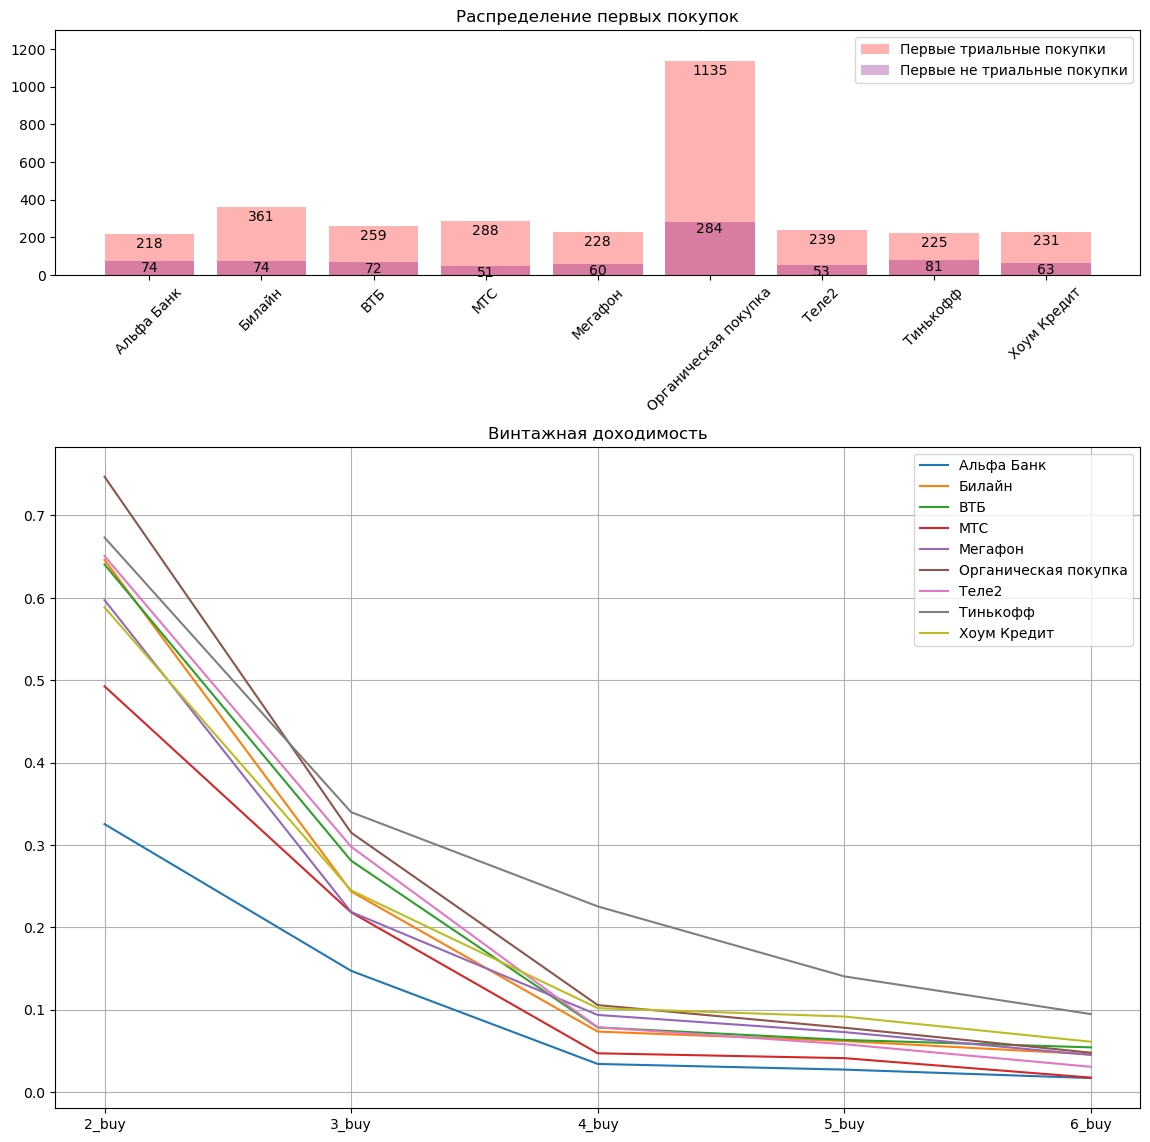

In [5]:
gridsize = (3, 2)
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=2)

fig.subplots_adjust(hspace=0.7)

bar1 = ax1.bar(df_m['name_partner'], df_m['1_trial_buy'], color = 'red', alpha = .3, label = 'Первые триальные покупки')
ax1.set_title('Распределение первых покупок')
ax1.xaxis.set_tick_params(rotation=45)

for rect in bar1:
    height = rect.get_height()
    ax1.annotate('{}'.format(height),
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, -12), 
                 textcoords="offset points",
                 ha='center', va='bottom')

bar2 = ax1.bar(df_m['name_partner'], df_m['1_not_trial_buy'], color = 'purple', alpha = .3, label = 'Первые не триальные покупки')

for rect in bar2:
    height = rect.get_height()
    ax1.annotate('{}'.format(height),
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, -10),
                 textcoords="offset points",
                 ha='center', va='bottom')
ax1.set_ylim([0,1300])


ax1.legend()

for i in df_m2['name_partner'].unique():
    a = (df_m2[df_m2['name_partner']==i].squeeze())
    ax2.plot(a.iloc[1:], label = a.iloc[0])
    
ax2.set_title("Винтажная доходимость")

ax2.legend()
plt.grid()
plt.show()